In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [49]:
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False

Windows


In [75]:
# 파일리스트 만들기
file_list = os.listdir('./data/analysis_data')

In [76]:
# 파일리스트로 csv파일 불러오기
dataset = {} 
for file in file_list:
    file_key = str(file.split('.')[0])
    filename = f'./data/analysis_data/{file}'
    dataset[file_key] = pd.read_csv(filename, index_col=0, encoding='cp949')

In [77]:
# GRDP 데이터프레임 만들기
df_grdp = dataset["1인당_GRDP_시도__20230111165550_분석(전년_대비_증감,증감률)"][["2019","2020","2021 p)"]]
df_grdp = df_grdp.iloc[2:]

□정의
- 1인당 GRDP: 지역내 총생산을 지역 인구수로 나눈 1인당 연간 생산액

□의의
- 1인당 GRDP가 높다는 것은 그 지역 재정자립도가 높다는 것을 의미하고 반대로 1인당 GRDP가 낮다는 것은 재정자립도가 낮아 중앙정부의 지원이 필요하다는 것을 의미

In [78]:
# 1인당 민간소비지출액 데이터프레임 만들기
df_expend = dataset["1인당_민간소비지출액_시도__20230111165132_분석(전년_대비_증감,증감률)"]
df_expend = df_expend[["2019","2020","2021 p)"]].iloc[2:]

In [79]:
# 1인당 지역총소득 데이터프레임 만들기
df_income = dataset["1인당_지역총소득_시도__20230111165055_분석(전년_대비_증감,증감률)"]
df_income = df_income[["2019","2020","2021 p)"]].iloc[2:]

In [99]:
# 지역별 총 업체수 데이터프레임 만들기
df_num_company = dataset["시도_산업중분류별_주요지표_20230112092551"][["2019","2020"]].iloc[2:]

In [100]:
# 지역별 총 업체수 데이터프레임 만들기
df_profit = dataset["시도_산업중분류별_주요지표_20230112092551"][["2019.4","2020.4"]].iloc[2:]
df_profit.columns=["2019","2020"]

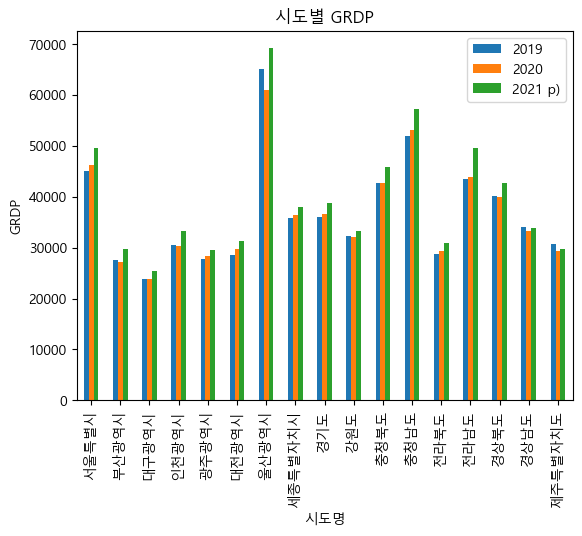

In [130]:
df_grdp.astype(int).plot(kind='bar')
plt.title("시도별 GRDP")
plt.xlabel("시도명")
plt.ylabel("GRDP")
plt.show()

In [131]:
analysis_list = [df_grdp,df_expend,df_income,df_num_company,df_profit]

In [163]:
seoul_data = []
for i in analysis_list:
    seoul_data.append(i.iloc[0])

In [173]:
seoul_data[0]

2019       45118
2020       46221
2021 p)    49648
Name: 서울특별시, dtype: object

ValueError: num must be 1 <= num <= 4, not 5

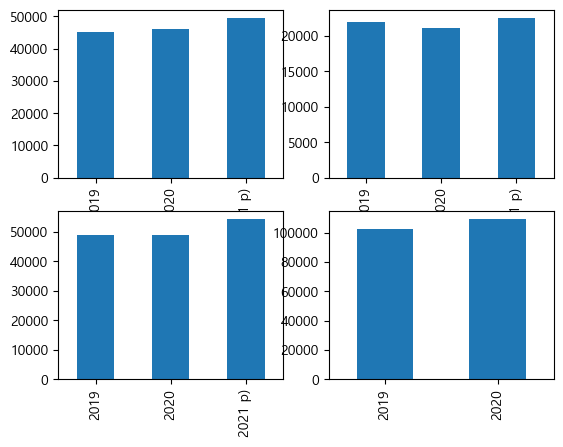

In [179]:
for i in range(1,len(seoul_data)+1):
    plt.subplot(2,2,i)
    seoul_data[i-1].astype(int).plot(kind='bar')